## Start via importing libraries and accessing file path

In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Titanic sink

In [16]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

## Read csv files using pandas

In [17]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head(15)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
5                                    Moran, Mr. James    male   NaN      0   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
7                      Palsson, Master. Gosta Leonard    male   2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
12                     Saundercock, Mr. William Henry    male  20.0      0   
13                        Andersson, Mr. Anders Johan    male  39.0      1   
14               Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   

    Parch            Ticket     Fare Cabin Embarked  
0       0         A/5 21171   7.2500   NaN        S  
1       0          PC 17599  71.2833   C85        C  
2       0  STON/O2. 3101282   7.9250   NaN        S  
3       0            113803  53.1000  C123        S  
4       0            373450   8.0500   NaN        S  
5       0            330877   8.4583   NaN        Q  
6       0             17463  51.8625   E46        S  
7       1            349909  21.0750   NaN        S  
8       2            347742  11.1333   NaN        S  
9       0            237736  30.0708   NaN        C  
10      1           PP 9549  16.7000    G6        S  
11      0            113783  26.5500  C103        S  
12      0         A/5. 2151   8.0500   NaN        S  
13      5            347082  31.2750   NaN        S  
14      0            350406   7.8542   NaN        S

In [18]:
train_df["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [19]:
train_df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [20]:
train_df["Age"].max()

80.0

In [21]:
train_df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [22]:
train_df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [23]:
train_df["Fare"].max()

512.3292

In [24]:
train_df["Fare"].min()

0.0

In [25]:
train_df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [26]:
train_df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [27]:
test_df.head(10)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0  34.5      0      0     330911   7.8292   NaN        Q  
1  47.0      1      0     363272   7.0000   NaN        S  
2  62.0      0      0     240276   9.6875   NaN        Q  
3  27.0      0      0     315154   8.6625   NaN        S  
4  22.0      1      1    3101298  12.2875   NaN        S  
5  14.0      0      0       7538   9.2250   NaN        S  
6  30.0      0      0     330972   7.6292   NaN        Q  
7  26.0      1      1     248738  29.0000   NaN        S  
8  18.0      0      0       2657   7.2292   NaN        C  
9  21.0      2      0  A/4 48871  24.1500   NaN        S

### Checking rows and columns

In [28]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Checking missing values

In [31]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Describing data

In [33]:
train_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [34]:
train_df.describe(include=['O'])

Name   Sex  Ticket        Cabin Embarked
count                    891   891     891          204      889
unique                   891     2     681          147        3
top     Fynney, Mr. Joseph J  male  347082  C23 C25 C27        S
freq                       1   577       7            4      644

In [35]:
# Lets check total women survived rate
women_surv = train_df.loc[train_df.Sex == 'female']["Survived"]
women_rate = sum(women_surv)/len(women_surv)
print("Total women survived (%):", women_rate*100)

Total women survived (%): 74.20382165605095


In [36]:
# Printing num and categ columns which is used in data preprocessing
num_col = train_df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = train_df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Categorical columns: 
 Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [37]:
train_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### A simple bar chart to visualize survived count

In [38]:
def bar_chart(feature):
    survived = train_df[train_df['Survived']==1][feature].value_counts()
    dead = train_df[train_df['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',color=["pink","grey","cyan","red","gold","black","blue"],stacked=True, figsize=(5,7)) 

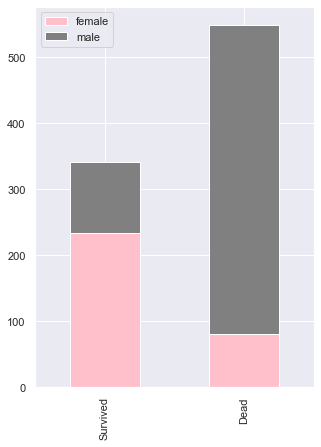

In [39]:
bar_chart('Sex')

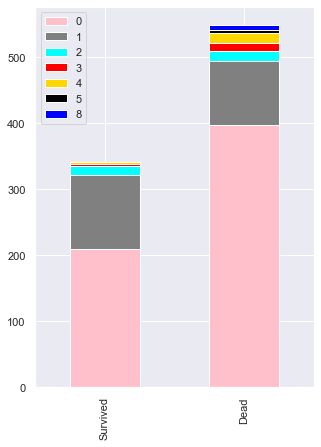

In [40]:
bar_chart('SibSp')

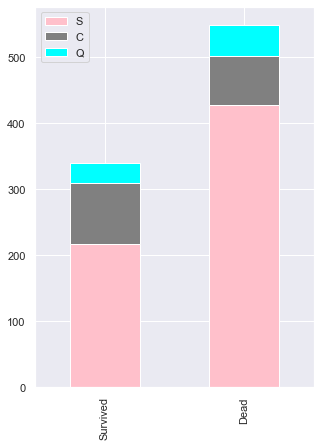

In [41]:
bar_chart('Embarked')

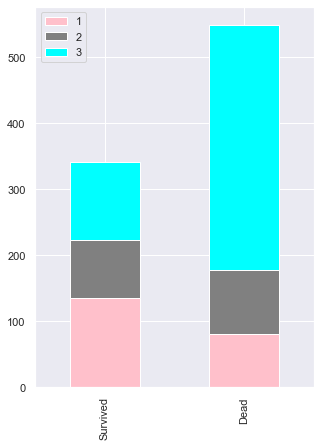

In [42]:
bar_chart('Pclass')

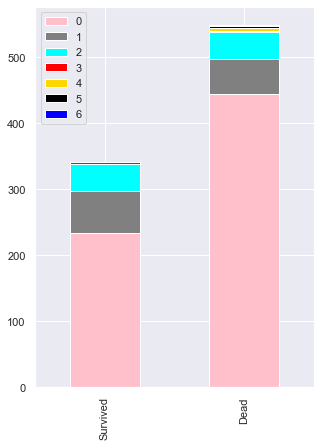

In [43]:
bar_chart('Parch')

In [44]:
train_df.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [45]:
test_df.head(2)

PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S

## Missing value treatment for embarked feature

In [46]:
most_freq = train_df.Embarked.dropna().mode()[0]
train_df['Embarked'] = train_df['Embarked'].fillna(most_freq)
test_df['Embarked'] = test_df['Embarked'].fillna(most_freq)

# Sex and Embarked encoding
train_gender_encode = train_df.replace(to_replace={'Sex': {'female': 1,'male':0}})
train_data = train_gender_encode.replace(to_replace={'Embarked': {'S': 0,'C': 1,'Q': 2}})

test_gender_encode = test_df.replace(to_replace={'Sex': {'female': 1,'male':0}})
test_data = test_gender_encode.replace(to_replace={'Embarked': {'S': 0,'C': 1,'Q': 2}})

In [47]:
test_data.head(2)

PassengerId  Pclass                              Name  Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    0  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)    1  47.0      1   

   Parch  Ticket    Fare Cabin  Embarked  
0      0  330911  7.8292   NaN         2  
1      0  363272  7.0000   NaN         0

In [48]:
print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


## Processing title feature

In [49]:
# Title

train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Capt          1
Jonkheer      1
Sir           1
Lady          1
Mme           1
Don           1
Ms            1
Name: Title, dtype: int64

In [50]:
test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [51]:
test_data.head(2)

PassengerId  Pclass                              Name  Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    0  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)    1  47.0      1   

   Parch  Ticket    Fare Cabin  Embarked Title  
0      0  330911  7.8292   NaN         2    Mr  
1      0  363272  7.0000   NaN         0   Mrs

In [52]:
title_map = {"Mr": 0, "Miss": 1, "Mrs": 2, 
             "Master": 3, "Dr": 4, "Rev": 4, 
             "Col": 4, "Major": 4, "Mlle": 4,
             "Countess": 4,"Ms": 4, "Lady": 4, 
             "Jonkheer": 4, "Don": 4, "Dona" : 4, 
             "Mme": 4,"Capt": 4,"Sir": 4 }
train_data['Title'] = train_data['Title'].map(title_map)
test_data['Title'] = test_data['Title'].map(title_map)

In [53]:
train_data.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   

      Ticket     Fare Cabin  Embarked  Title  
0  A/5 21171   7.2500   NaN         0      0  
1   PC 17599  71.2833   C85         1      2

In [54]:
# Delete name feature from both train and test set
train_data.drop('Name', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)

In [55]:
#Checking train data missing value
train_data.isna().sum()* 100 / len(train_data)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.000000
Title           0.000000
dtype: float64

In [56]:
#Checking test data missing value
test_data.isna().sum()* 100 / len(test_data)

PassengerId     0.000000
Pclass          0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
Title           0.000000
dtype: float64

## Processing cabin feature

In [57]:
# cabin
train_data.Cabin.value_counts()


C23 C25 C27    4
B96 B98        4
G6             4
F33            3
D              3
              ..
A26            1
C91            1
B30            1
D6             1
C128           1
Name: Cabin, Length: 147, dtype: int64

In [58]:
train_data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [59]:
train_data['Cabin'] = train_data['Cabin'].str[:1]
test_data['Cabin'] = test_data['Cabin'].str[:1]
train_data.head(20)

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0             1         0       3    0  22.0      1      0         A/5 21171   
1             2         1       1    1  38.0      1      0          PC 17599   
2             3         1       3    1  26.0      0      0  STON/O2. 3101282   
3             4         1       1    1  35.0      1      0            113803   
4             5         0       3    0  35.0      0      0            373450   
5             6         0       3    0   NaN      0      0            330877   
6             7         0       1    0  54.0      0      0             17463   
7             8         0       3    0   2.0      3      1            349909   
8             9         1       3    1  27.0      0      2            347742   
9            10         1       2    1  14.0      1      0            237736   
10           11         1       3    1   4.0      1      1           PP 9549   
11           12         1       1    1  58.0      0      0            113783   
12           13         0       3    0  20.0      0      0         A/5. 2151   
13           14         0       3    0  39.0      1      5            347082   
14           15         0       3    1  14.0      0      0            350406   
15           16         1       2    1  55.0      0      0            248706   
16           17         0       3    0   2.0      4      1            382652   
17           18         1       2    0   NaN      0      0            244373   
18           19         0       3    1  31.0      1      0            345763   
19           20         1       3    1   NaN      0      0              2649   

       Fare Cabin  Embarked  Title  
0    7.2500   NaN         0      0  
1   71.2833     C         1      2  
2    7.9250   NaN         0      1  
3   53.1000     C         0      2  
4    8.0500   NaN         0      0  
5    8.4583   NaN         2      0  
6   51.8625     E         0      0  
7   21.0750   NaN         0      3  
8   11.1333   NaN         0      2  
9   30.0708   NaN         1      2  
10  16.7000     G         0      1  
11  26.5500     C         0      1  
12   8.0500   NaN         0      0  
13  31.2750   NaN         0      0  
14   7.8542   NaN         0      1  
15  16.0000   NaN         0      2  
16  29.1250   NaN         2      3  
17  13.0000   NaN         0      0  
18  18.0000   NaN         0      2  
19   7.2250   NaN         1      2

In [60]:
# Train data
Pclass1 = train_data[train_data['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train_data[train_data['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train_data[train_data['Pclass']==3]['Cabin'].value_counts()
train_data_df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
train_data_df.index = ['1st class','2nd class', '3rd class']
train_data_df.head()

C     B     D     E     A    T    F    G
1st class  59.0  47.0  29.0  25.0  15.0  1.0  NaN  NaN
2nd class   NaN   NaN   4.0   4.0   NaN  NaN  8.0  NaN
3rd class   NaN   NaN   NaN   3.0   NaN  NaN  5.0  4.0

In [61]:
# Test data
Pclass1 = test_data[test_data['Pclass']==1]['Cabin'].value_counts()
Pclass2 = test_data[test_data['Pclass']==2]['Cabin'].value_counts()
Pclass3 = test_data[test_data['Pclass']==3]['Cabin'].value_counts()
test_data_df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
test_data_df.index = ['1st class','2nd class', '3rd class']
test_data_df.head()

C     B     D    E    A    F    G
1st class  35.0  18.0  11.0  9.0  7.0  NaN  NaN
2nd class   NaN   NaN   2.0  NaN  NaN  5.0  NaN
3rd class   NaN   NaN   NaN  NaN  NaN  3.0  1.0

<AxesSubplot:>

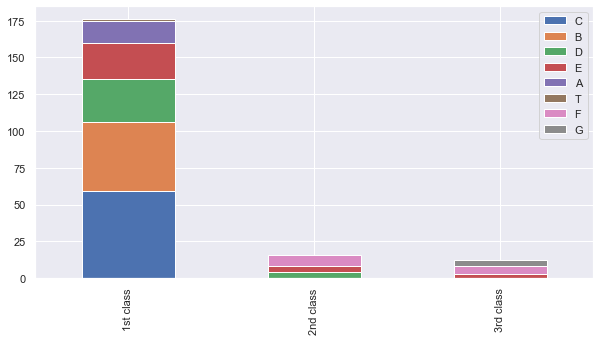

In [62]:
train_data_df.plot(kind='bar',stacked=True, figsize=(10,5))

<AxesSubplot:>

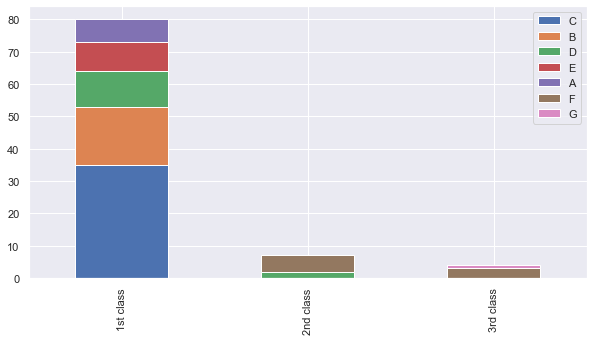

In [63]:
test_data_df.plot(kind='bar',stacked=True, figsize=(10,5))

In [64]:
cabin_map = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
train_data['Cabin'] = train_data['Cabin'].map(cabin_map)
test_data['Cabin'] = test_data['Cabin'].map(cabin_map)

In [135]:
train_data['Cabin'].value_counts()

2.0    492
1.8    168
0.8     99
0.4     47
1.2     33
1.6     32
0.0     15
2.4      4
2.8      1
Name: Cabin, dtype: int64

In [65]:
# fill missing Fare with median fare for each Pclass
train_data["Cabin"].fillna(train_data.groupby('Pclass')['Cabin'].transform("median"), inplace=True)
test_data["Cabin"].fillna(test_data.groupby('Pclass')['Cabin'].transform("median"), inplace=True)

In [136]:
train_data['Cabin'].value_counts()

2.0    492
1.8    168
0.8     99
0.4     47
1.2     33
1.6     32
0.0     15
2.4      4
2.8      1
Name: Cabin, dtype: int64

In [66]:
train_data.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0            1         0       3    0  22.0      1      0         A/5 21171   
1            2         1       1    1  38.0      1      0          PC 17599   
2            3         1       3    1  26.0      0      0  STON/O2. 3101282   
3            4         1       1    1  35.0      1      0            113803   
4            5         0       3    0  35.0      0      0            373450   

      Fare  Cabin  Embarked  Title  
0   7.2500    2.0         0      0  
1  71.2833    0.8         1      2  
2   7.9250    2.0         0      1  
3  53.1000    0.8         0      2  
4   8.0500    2.0         0      0

In [67]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Title            0
dtype: int64

## Missing value treatment for age

In [68]:
# Let's use Title's and pclass median age for missing Age

train_data["Age"].fillna(train_data.groupby(['Title','Pclass'])['Age'].transform("median"), inplace=True)
test_data["Age"].fillna(test_data.groupby(['Title','Pclass'])['Age'].transform("median"), inplace=True)

In [69]:
# encoding age in train data
train_data.loc[train_data['Age'] <= 16, 'Age'] = 0
train_data.loc[(train_data['Age'] > 16) & (train_data['Age'] <= 26), 'Age'] = 1
train_data.loc[(train_data['Age'] > 26) & (train_data['Age'] <= 36), 'Age'] = 2
train_data.loc[(train_data['Age'] > 36) & (train_data['Age'] <= 62), 'Age'] = 3
train_data.loc[train_data['Age'] > 62, 'Age'] = 4

# encoding age in test data
test_data.loc[test_data['Age'] <= 16, 'Age'] = 0
test_data.loc[(test_data['Age'] > 16) & (test_data['Age'] <= 26), 'Age'] = 1
test_data.loc[(test_data['Age'] > 26) & (test_data['Age'] <= 36), 'Age'] = 2
test_data.loc[(test_data['Age'] > 36) & (test_data['Age'] <= 62), 'Age'] = 3
test_data.loc[test_data['Age'] > 62, 'Age'] = 4


In [70]:
train_data.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

      Fare  Cabin  Embarked  Title  
0   7.2500    2.0         0      0  
1  71.2833    0.8         1      2  
2   7.9250    2.0         0      1  
3  53.1000    0.8         0      2  
4   8.0500    2.0         0      0

In [71]:
test_data.head()

PassengerId  Pclass  Sex  Age  SibSp  Parch   Ticket     Fare  Cabin  \
0          892       3    0  2.0      0      0   330911   7.8292    2.0   
1          893       3    1  3.0      1      0   363272   7.0000    2.0   
2          894       2    0  3.0      0      0   240276   9.6875    2.0   
3          895       3    0  2.0      0      0   315154   8.6625    2.0   
4          896       3    1  1.0      1      1  3101298  12.2875    2.0   

   Embarked  Title  
0         2      0  
1         0      2  
2         2      0  
3         0      0  
4         0      2

In [72]:
test_data.isna().sum()
test_data['Age'].fillna((test_data['Age'].mean()), inplace=True)
test_data['Fare'].fillna((test_data['Fare'].mean()), inplace=True)

In [73]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

## Processing Fare feature

In [74]:
# Split the datasets into 4 ranges using qcut
train_data['Farerange'] = pd.qcut(train_data['Fare'], 4)
train_data[['Farerange', 'Survived']].groupby(['Farerange'], as_index=False).mean().sort_values(by='Farerange', ascending=True)

Farerange  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081

In [75]:
#Categorize the fare values for train data
train_data.loc[ train_data['Fare'] <= 7.91, 'Fare'] = 0
train_data.loc[(train_data['Fare'] > 7.91) & (train_data['Fare'] <= 14.454), 'Fare'] = 1
train_data.loc[(train_data['Fare'] > 14.454) & (train_data['Fare'] <= 31), 'Fare']   = 2
train_data.loc[ train_data['Fare'] > 31, 'Fare'] = 3

#Categorize the fare values for test data
test_data.loc[ test_data['Fare'] <= 7.91, 'Fare'] = 0
test_data.loc[(test_data['Fare'] > 7.91) & (test_data['Fare'] <= 14.454), 'Fare'] = 1
test_data.loc[(test_data['Fare'] > 14.454) & (test_data['Fare'] <= 31), 'Fare']   = 2
test_data.loc[ test_data['Fare'] > 31, 'Fare'] = 3


In [76]:
train_data.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    0  1.0      1      0         A/5 21171   
1            2         1       1    1  3.0      1      0          PC 17599   
2            3         1       3    1  1.0      0      0  STON/O2. 3101282   
3            4         1       1    1  2.0      1      0            113803   
4            5         0       3    0  2.0      0      0            373450   

   Fare  Cabin  Embarked  Title        Farerange  
0   0.0    2.0         0      0   (-0.001, 7.91]  
1   3.0    0.8         1      2  (31.0, 512.329]  
2   1.0    2.0         0      1   (7.91, 14.454]  
3   3.0    0.8         0      2  (31.0, 512.329]  
4   1.0    2.0         0      0   (7.91, 14.454]

In [77]:
#Remove the features of no use
train_data = train_data.drop(['PassengerId','Farerange', 'Ticket'], axis=1)
test_data  = test_data.drop(['Ticket'], axis=1)

In [78]:
train_data.head()

Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Cabin  Embarked  Title
0         0       3    0  1.0      1      0   0.0    2.0         0      0
1         1       1    1  3.0      1      0   3.0    0.8         1      2
2         1       3    1  1.0      0      0   1.0    2.0         0      1
3         1       1    1  2.0      1      0   3.0    0.8         0      2
4         0       3    0  2.0      0      0   1.0    2.0         0      0

In [79]:
test_data.head()

PassengerId  Pclass  Sex  Age  SibSp  Parch  Fare  Cabin  Embarked  Title
0          892       3    0  2.0      0      0   0.0    2.0         2      0
1          893       3    1  3.0      1      0   0.0    2.0         0      2
2          894       2    0  3.0      0      0   1.0    2.0         2      0
3          895       3    0  2.0      0      0   1.0    2.0         0      0
4          896       3    1  1.0      1      1   1.0    2.0         0      2

In [80]:
# Split the dataframe into x and y
x_train = train_data.drop('Survived', axis=1)
y_train = train_data.Survived

In [81]:
x_train.head()

Pclass  Sex  Age  SibSp  Parch  Fare  Cabin  Embarked  Title
0       3    0  1.0      1      0   0.0    2.0         0      0
1       1    1  3.0      1      0   3.0    0.8         1      2
2       3    1  1.0      0      0   1.0    2.0         0      1
3       1    1  2.0      1      0   3.0    0.8         0      2
4       3    0  2.0      0      0   1.0    2.0         0      0

In [82]:
x_test  = test_data.copy()
x_test.drop(['PassengerId'], axis=1)

Pclass  Sex  Age  SibSp  Parch  Fare  Cabin  Embarked  Title
0         3    0  2.0      0      0   0.0    2.0         2      0
1         3    1  3.0      1      0   0.0    2.0         0      2
2         2    0  3.0      0      0   1.0    2.0         2      0
3         3    0  2.0      0      0   1.0    2.0         0      0
4         3    1  1.0      1      1   1.0    2.0         0      2
..      ...  ...  ...    ...    ...   ...    ...       ...    ...
413       3    0  1.0      0      0   1.0    2.0         0      0
414       1    1  3.0      0      0   3.0    0.8         1      4
415       3    0  3.0      0      0   0.0    2.0         0      0
416       3    0  1.0      0      0   1.0    2.0         0      0
417       3    0  0.0      1      1   2.0    2.0         1      3

[418 rows x 9 columns]

In [83]:
print("x_train",x_train.shape)
print("y_train",y_train.shape)

print("x_test",x_test.shape)

x_train (891, 9)
y_train (891,)
x_test (418, 10)


In [84]:
x_train ["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [85]:
x_train ["Sex"].unique()

array([0, 1], dtype=int64)

In [137]:
x_train ["Age"].unique()

array([1., 3., 2., 0., 4.])

In [87]:
x_train ["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [88]:
x_train ["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [89]:
x_train ["Cabin"].unique()

array([2. , 0.8, 1.6, 1.8, 2.4, 1.2, 0. , 0.4, 2.8])

In [134]:
x_train ["Cabin"].value_counts()

2.0    492
1.8    168
0.8     99
0.4     47
1.2     33
1.6     32
0.0     15
2.4      4
2.8      1
Name: Cabin, dtype: int64

In [90]:
x_train ["Embarked"].unique()

array([0, 1, 2], dtype=int64)

In [91]:
x_train ["Fare"].min()

0.0

In [92]:
x_train ["Fare"].max()

3.0

In [93]:
x_train ["Title"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

# Model Building

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 


In [95]:
def build_models(model,x_train,y_train,folds=10):
    model = model.fit(x_train,y_train)
    accuracy = round(model.score(x_train,y_train)* 100,2)
    
    # Performing cross validation
    cv_score = cross_val_score(model,x_train,y_train,cv=folds,n_jobs=1)
    cv_accuracy = round(np.mean(cv_score)*100, 2) 
    return cv_score, accuracy, cv_accuracy

## Logistic Regression

In [96]:
log_train_pred, log_acc, log_cv_acc = build_models(LogisticRegression(),x_train,y_train)
print("Accuracy: %s" % log_acc)
print("CV Accuracy: %s" % log_cv_acc)

Accuracy: 82.38
CV Accuracy: 82.04


## KNN

In [97]:

# To find k use elbow method
def elbow(k):
    accuracy = []
    for i in k:
        knn = KNeighborsClassifier(n_neighbors=i)
        score = cross_val_score(knn,x_train,y_train)
        accuracy.append(score.mean())
    return accuracy   

In [98]:
k_vlaue = elbow(range(1,40))

Text(0, 0.5, 'Accuracy')

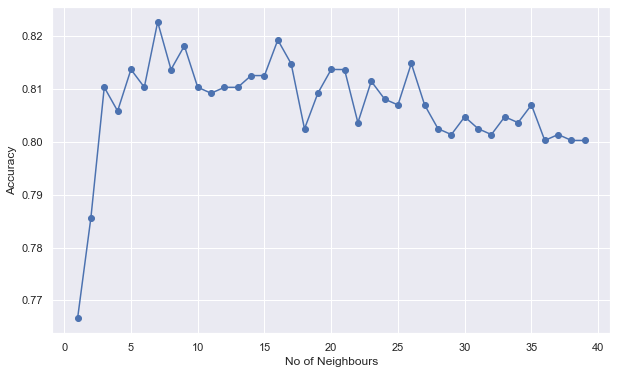

In [99]:
# plotting the Curves
plt.figure(figsize=(10,6))
plt.plot(range(1,40),k_vlaue,marker = 'o')
plt.xlabel('No of Neighbours')
plt.ylabel('Accuracy')


In [100]:
# Lets take k=12
knn_train_pred, knn_acc, knn_cv_acc = build_models(KNeighborsClassifier(n_neighbors=12),x_train,y_train)
print("Accuracy: %s" % knn_acc)
print("CV Accuracy: %s" % knn_cv_acc)

Accuracy: 83.28
CV Accuracy: 81.26


## SVC

In [101]:
svc_train_pred, svc_acc, svc_cv_acc = build_models(SVC(),x_train,y_train)
print("Accuracy: %s" % svc_acc)
print("CV Accuracy: %s" % svc_cv_acc)

Accuracy: 83.84
CV Accuracy: 82.6


## GaussianNB

In [102]:
gnb_train_pred, gnb_acc, gnb_cv_acc = build_models(GaussianNB(),x_train,y_train)
print("Accuracy: %s" % gnb_acc)
print("CV Accuracy: %s" % gnb_cv_acc)

Accuracy: 77.55
CV Accuracy: 77.66


## Decision tree

In [103]:
dt_train_pred, dt_acc, dt_cv_acc = build_models(DecisionTreeClassifier(),x_train,y_train)
print("Accuracy: %s" % dt_acc)
print("CV Accuracy: %s" % dt_cv_acc)

Accuracy: 91.81
CV Accuracy: 81.37


## Random forest

In [104]:
rf_train_pred, rf_acc, rf_cv_acc = build_models(RandomForestClassifier(),x_train,y_train)
print("Accuracy: %s" % rf_acc)
print("CV Accuracy: %s" % rf_cv_acc)

Accuracy: 91.81
CV Accuracy: 82.5


## Ada boost

In [105]:
ada_train_pred, ada_acc, ada_cv_acc = build_models(AdaBoostClassifier(),x_train,y_train)
print("Accuracy: %s" % ada_acc)
print("CV Accuracy: %s" % ada_cv_acc)

Accuracy: 82.27
CV Accuracy: 81.14


## Gradient boost

In [106]:
gb_train_pred, gb_acc, gb_cv_acc = build_models(GradientBoostingClassifier(),x_train,y_train)
print("Accuracy: %s" % gb_acc)
print("CV Accuracy: %s" % gb_cv_acc)

Accuracy: 87.99
CV Accuracy: 82.61


## XG boost

In [107]:
xgb_train_pred, xgb_acc, xgb_cv_acc = build_models(XGBClassifier(),x_train,y_train)
print("Accuracy: %s" % xgb_acc)
print("CV Accuracy: %s" % xgb_cv_acc)

Accuracy: 86.42
CV Accuracy: 83.17


In [108]:
# Normal accuracy
models = pd.DataFrame({
    'model': ['Logistic Regression','KNN','SVC', 
              'GaussianNB','Decision Tree','Random Forest',
              'Ada Boost','Gradient Boost','XGBoost'],
    'accuracy': [log_acc,knn_acc,svc_acc,gnb_acc,dt_acc,rf_acc,ada_acc,gb_acc,xgb_acc]})
models.sort_values(by='accuracy', ascending=False)

model  accuracy
4        Decision Tree     91.81
5        Random Forest     91.81
7       Gradient Boost     87.99
8              XGBoost     86.42
2                  SVC     83.84
1                  KNN     83.28
0  Logistic Regression     82.38
6            Ada Boost     82.27
3           GaussianNB     77.55

In [109]:
# Cross validation accuracy
models = pd.DataFrame({
    'model': ['Logistic Regression','KNN','SVC', 
              'GaussianNB','Decision Tree','Random Forest',
              'Ada Boost','Gradient Boost','XGBoost'],
    'cv_accuracy': [log_cv_acc,knn_cv_acc,svc_cv_acc,gnb_cv_acc,dt_cv_acc,rf_cv_acc,ada_cv_acc,gb_cv_acc,xgb_cv_acc]})
models.sort_values(by='cv_accuracy', ascending=False)

model  cv_accuracy
8              XGBoost        83.17
7       Gradient Boost        82.61
2                  SVC        82.60
5        Random Forest        82.50
0  Logistic Regression        82.04
4        Decision Tree        81.37
1                  KNN        81.26
6            Ada Boost        81.14
3           GaussianNB        77.66

# Hyper parameter tuning

In [110]:
# Lets tune with the best parameters for xgb, random forest and gradient boosting
# Random forest tuning
param_grid = { 'max_depth'   : [3,4,7,10,15,20,30],
               'n_estimators' : [88,100,155,200]
             } 
rfclassifier = RandomForestClassifier()
grid = GridSearchCV(rfclassifier, param_grid, refit = True, verbose = 1) 
grid.fit(x_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:  1.2min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 7, 10, 15, 20, 30],
                         'n_estimators': [88, 100, 155, 200]},
             verbose=1)

In [111]:
print(grid.best_params_) 
print(grid.best_estimator_)

{'max_depth': 20, 'n_estimators': 88}
RandomForestClassifier(max_depth=20, n_estimators=88)


In [112]:
# Random forest
rf_hyper_train_pred, rf_hyper_acc, rf_cv_hyper_acc = build_models(RandomForestClassifier(max_depth=4, n_estimators=100),x_train,y_train)
print("Accuracy: %s" % rf_hyper_acc)
print("CV Accuracy: %s" % rf_cv_hyper_acc)

Accuracy: 83.61
CV Accuracy: 82.94


In [113]:
# Gradient boosting tuning
gb_params = {'n_estimators':[90,100,150],
             'learning_rate':[1e-2,0.1,0.5,1],
             'max_depth':[3,4,6], 
             'min_samples_leaf':[1,3,5]}
gbclassifier = GradientBoostingClassifier()
grid = GridSearchCV(gbclassifier, gb_params, refit = True, verbose = 1) 
grid.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  3.4min finished


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [3, 4, 6], 'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [90, 100, 150]},
             verbose=1)

In [114]:
print(grid.best_params_) 
print(grid.best_estimator_)

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 3, 'n_estimators': 150}
GradientBoostingClassifier(max_depth=4, min_samples_leaf=3, n_estimators=150)


In [115]:
# Gradient boosting
gb_hyper_train_pred, gb_hyper_acc, gb_cv_hyper_acc = build_models(GradientBoostingClassifier(max_depth=6, min_samples_leaf=3, n_estimators=100,learning_rate=0.1),x_train,y_train)
print("Accuracy: %s" % gb_hyper_acc)
print("CV Accuracy: %s" % gb_cv_hyper_acc)

Accuracy: 90.8
CV Accuracy: 83.28


In [116]:
# XGB
xgb_params = {'learning_rate':[0.1,0.5,1],
              'max_depth':[4,6,9],
              'gamma':[0,10,55,73],
              'alpha':[0,23,67,103]}
xgbclassifier = XGBClassifier()
grid = GridSearchCV(xgbclassifier, xgb_params, refit = True, verbose = 1) 
grid.fit(x_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  1.8min finished


GridSearchCV(estimator=XGBClassifier(),
             param_grid={'alpha': [0, 23, 67, 103], 'gamma': [0, 10, 55, 73],
                         'learning_rate': [0.1, 0.5, 1],
                         'max_depth': [4, 6, 9]},
             verbose=1)

In [117]:
print(grid.best_params_) 
print(grid.best_estimator_)

{'alpha': 0, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 4}
XGBClassifier(alpha=0, learning_rate=0.5, max_depth=4)


In [118]:
# XG boost
xgb_hyper_train_pred, xgb_hyper_acc, xgb_hyper_cv_acc = build_models(XGBClassifier(alpha=0, gamma=0, learning_rate=0.5, max_depth=4),x_train,y_train)
print("Accuracy: %s" % xgb_hyper_acc)
print("CV Accuracy: %s" % xgb_hyper_cv_acc)

Accuracy: 90.01
CV Accuracy: 83.06


In [119]:
# Final prediction
all_models = pd.DataFrame({
    'model': ['Logistic Regression','KNN','SVC', 
              'GaussianNB','Decision Tree','Random Forest',
              'Ada Boost','Gradient Boost','XGBoost'],
    'final_accuracy': [log_cv_acc,knn_cv_acc,svc_cv_acc,gnb_cv_acc,dt_cv_acc,rf_cv_hyper_acc,ada_cv_acc,gb_cv_hyper_acc,xgb_hyper_cv_acc]})
all_models.sort_values(by='final_accuracy', ascending=False)

model  final_accuracy
7       Gradient Boost           83.28
8              XGBoost           83.06
5        Random Forest           82.94
2                  SVC           82.60
0  Logistic Regression           82.04
4        Decision Tree           81.37
1                  KNN           81.26
6            Ada Boost           81.14
3           GaussianNB           77.66

In [120]:
test_data.head(10)

PassengerId  Pclass  Sex  Age  SibSp  Parch  Fare  Cabin  Embarked  Title
0          892       3    0  2.0      0      0   0.0    2.0         2      0
1          893       3    1  3.0      1      0   0.0    2.0         0      2
2          894       2    0  3.0      0      0   1.0    2.0         2      0
3          895       3    0  2.0      0      0   1.0    2.0         0      0
4          896       3    1  1.0      1      1   1.0    2.0         0      2
5          897       3    0  0.0      0      0   1.0    2.0         0      0
6          898       3    1  2.0      0      0   0.0    2.0         2      1
7          899       2    0  1.0      1      1   2.0    2.0         0      0
8          900       3    1  1.0      0      0   0.0    2.0         1      2
9          901       3    0  1.0      2      0   2.0    2.0         0      0

In [121]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [122]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(test_data.shape)

(891, 9)
(891,)
(418, 10)
(418, 10)


## Model testing with test data

In [123]:
# Evaluating best prediction model with test data
best_model =  GradientBoostingClassifier(max_depth=6, min_samples_leaf=3, n_estimators=100,learning_rate=0.1)
# best_model = XGBClassifier(alpha=0, gamma=0, learning_rate=0.5, max_depth=4)
best_model.fit(x_train,y_train)
test_data_1 = test_data.drop("PassengerId", axis=1).copy()
prediction = best_model.predict(test_data_1)

In [124]:
result_submission = pd.DataFrame({
        "PassengerId": x_test["PassengerId"],
        "Survived": prediction
    })
result_submission.to_csv('submission.csv', index=False)

In [125]:
submission = pd.read_csv('submission.csv')
submission.Survived.value_counts()


0    265
1    153
Name: Survived, dtype: int64

In [126]:
submission.head(20)

PassengerId  Survived
0           892         0
1           893         0
2           894         0
3           895         0
4           896         0
5           897         0
6           898         0
7           899         0
8           900         1
9           901         0
10          902         0
11          903         0
12          904         1
13          905         0
14          906         1
15          907         1
16          908         0
17          909         0
18          910         0
19          911         0

In [127]:
submission.tail(20)

PassengerId  Survived
398         1290         0
399         1291         0
400         1292         1
401         1293         0
402         1294         1
403         1295         0
404         1296         1
405         1297         1
406         1298         0
407         1299         0
408         1300         1
409         1301         1
410         1302         1
411         1303         1
412         1304         0
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

### we got boosting model with 83 percent accuracy and now it is pickled.
Pickle:
     The process to converts any kind of python objects (list, dict, etc.) into byte streams (0s and 1s) is called pickling or serialization or flattening or marshalling.

In [128]:
import pickle

pickle.dump(best_model, open("titanic_survival_prediction.pkl", "wb"))

In [129]:
# import xgboost.core

# bst = xgboost.core.Booster()

# bst.save_model('final_boost_model.json')

## Sample testing model with the flask

In [130]:
import requests,json
# local url
url = 'http://127.0.0.1:5000'

In [131]:
# sample data
# data = {'Pclass': 3,'Age': 1.0,'SibSp': 0,'Fare': 0.0,'Sex': 1,'Parch': 0,'Cabin': 2.0,'Embarked': 1,'Title': 2}
data = {'Pclass': 3,'Age': 2.0,'SibSp': 0,'Fare': 0.0,'Sex': 0,'Parch': 0,'Cabin': 2.0,'Embarked': 2,'Title': 0}
data = json.dumps(data)
data

'{"Pclass": 3, "Age": 2.0, "SibSp": 0, "Fare": 0.0, "Sex": 0, "Parch": 0, "Cabin": 2.0, "Embarked": 2, "Title": 0}'

In [132]:
send_request = requests.post(url,data)
send_request

<Response [500]>

In [133]:
# 1- survived and  0- not survived
print(send_request.json())

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

## Testing using heroku url

In [ ]:
url = 'https://titanic-survival-predict-devi.herokuapp.com/'

In [ ]:
heroku_data = {'Pclass': 3,'Age': 2.0,'SibSp': 0,'Fare': 0.0,'Sex': 0,'Parch': 0,'Cabin': 2.0,'Embarked': 2,'Title': 0}
heroku_data = json.dumps(heroku_data)
heroku_data

In [ ]:
send_request_heroku = requests.post(url,heroku_data)
send_request_heroku

In [ ]:
print(send_request_heroku.json())